# Decision Trees and Random Forests

We construct a *decision tree* with nodes and edges that splits our dataset recursively.

- Nodes are independent variables or features, edges are splitting thresholds.
- We have also the root node, which performs the first split
- The number of splits varies: we can have the possible categories of a variable, or thresholds of a continuous variable
- The splits or thresholds are computed based oon the entropy: the split that minimizes the **entropy** is sought
    - Intuition: try to choose the features that best split our data achieving maximum information gain or purity (more homogeneous subsets as result)
    - Two information purity metrics are commonly used:
        - Gini index: measure how often a randomly chosen element from the set would be incorrectly labeled
        - Information entropy: similar to Gini, but `log` is used due to its properties
        - Both are valid, but the purity spectrum value they yield is different
            - Gini: maximum impurity 0.5, maximum purity 0
            - Entropy: maximum impurity 1, maximum purity 0
- The leaf nodes contain the outcome class
- The trees ar enot balanced, some branches might be short, other can go much deeper

Decision trees don't perform so good on their own, but they are very good in **random forests**. A random forest is basically a set of different decision trees applied on random subsets (**bags**, **bootstrap sampling**) of the same dataset. We do **ensemble learning** with them: we let all trees predict an outcome and then apply **voting** to select the final outcome. Additionally, random forests have the following properties:

- Every time we need to add a splitting node in a tree, a random sample of m features can be used
- For classification: m = sqrt(p), p: number of all features
- This is done so, because this way we can minimize the effect of very strong features that dominate in the model; thus, the resulting trees are not so similar (they are "de-correlated"), and averaging them *does* reduce variance -- averaging similar trees would *not* reduce variance

*All in all, random forests have shown to be an extremely powerful method, often the first method to try with a new dataset.*

#### Kyphosis Dataset

Spinal condition. The dataset contains data of children (age in months) that went through surgery to correct a set of vertebrae (start - number). The outome states whether the children had kyphosis after the surgery or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
# Small dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


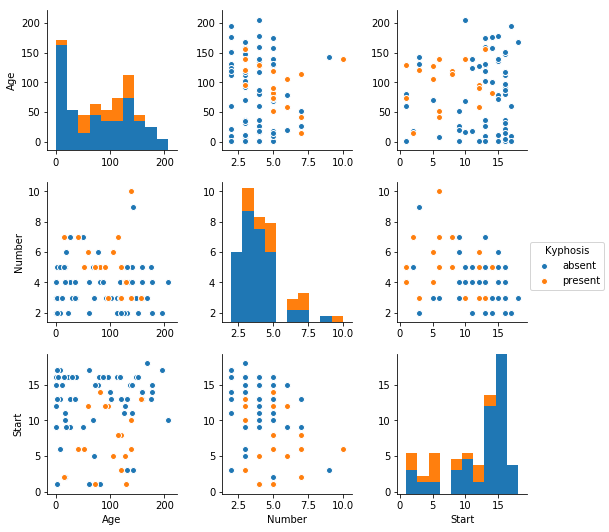

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [9]:
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree

In [10]:
# Load decision tree
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Instantiate decision tree
dtree = DecisionTreeClassifier()

In [12]:
# Fit/Train
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# Predict
predictions = dtree.predict(X_test)

In [14]:
# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))

[[15  4]
 [ 5  1]]


In [16]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.75      0.79      0.77        19
    present       0.20      0.17      0.18         6

avg / total       0.62      0.64      0.63        25



### Random Forest

In [17]:
# Load Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [18]:
# We instantiate our RandomForestClassifier for 200 trees
# 200 is an appropriate number for such a small dataset: 3 features, 81 samples
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
# Fit/Train
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
# Predict/Infer
rfc_pred = rfc.predict(X_test)

In [21]:
# Evaluate
# We see that it's difficult to decide whether a single decision tree or a random forest performs better
# That's mainly bcause our datset is very small.
# The decision lies on what is more relevant/critical: FP, FN, TP, TN, ...
# Which is the consequence/cost of each one?
# In general, with larger datsets, random forests outperform single decision trees
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



In [22]:
# An important point is that the number of absent vs present cases is different!
# Always check that...
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

### Decision Tree Visualization

Only single trees can be visualized, and additional software must be installed.

- `pip3 install pydot`
- Graphviz: https://graphviz.org/download/
    - Mac: `brew install graphviz`
    - Ubuntu: `sudo apt install graphviz`
    - Windows: download install packages


In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

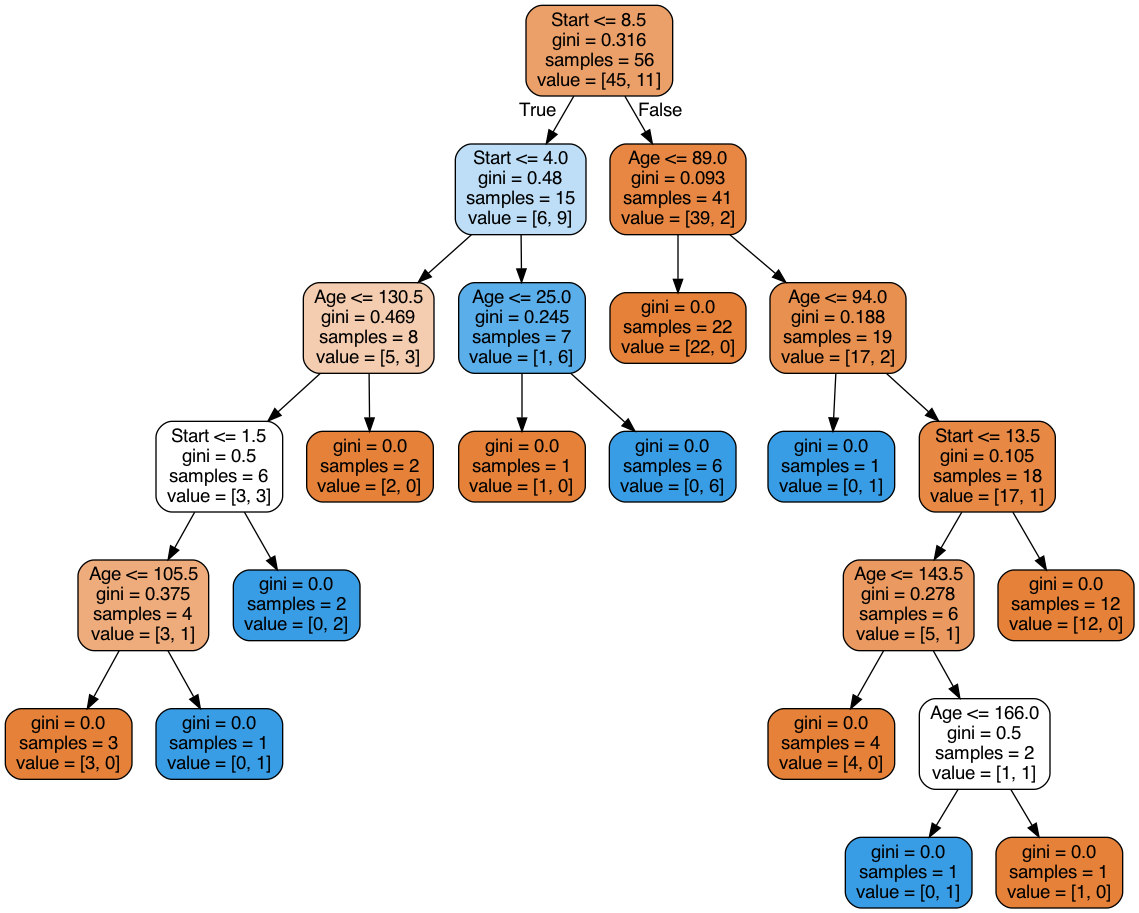

In [24]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
# Splits are done so as to optimize split dataset purity/homogeneity
# Purity can be mesured with
# - Gini (default): maximum impurity 0.5, maximum purity 0
# - Entropy (not used by default): maximum impurity 1, maximum purity 0
# Node colors are selected according to target (color) and gini purity (darker more pure)